In [31]:
#import the libraries neede

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import time 

In [32]:
#load data into pandas from csv
dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

In [33]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [34]:
pd.set_option('display.max_columns', None)
dete


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,SA,N,D,D,A,N,N,D,A,N,A,A,N,SA,SA,N,D,A,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,SA,D,D,D,A,A,N,A,N,A,A,N,A,N,N,A,A,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,A,A,A,A,A,D,N,A,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,D,D,A,SD,SD,SD,A,D,SD,SD,D,A,A,N,N,N,SD,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [35]:
dete['Position'].unique()

array(['Public Servant', 'Schools Officer', 'Teacher',
       'Head of Curriculum/Head of Special Education', 'Guidance Officer',
       'Teacher Aide', 'Cleaner', 'School Administrative Staff',
       'Technical Officer', 'Deputy Principal', 'School Principal', nan,
       'Business Service Manager', 'Professional Officer', 'Other',
       'School Based Professional Staff (Therapist, nurse, etc)'],
      dtype=object)

In [59]:
keep_columns = ['SeparationType','Cease Date','DETE Start Date','Employment Status','Job dissatisfaction','Dissatisfaction with the department','Position','Region','Age']
dete_clean = dete[keep_columns]

In [60]:
dete_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 9 columns):
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Employment Status                      817 non-null object
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Position                               817 non-null object
Region                                 822 non-null object
Age                                    811 non-null object
dtypes: bool(2), object(7)
memory usage: 46.7+ KB


In [61]:
dete_clean

,SeparationType,Cease Date,DETE Start Date,Employment Status,Job dissatisfaction,Dissatisfaction with the department,Position,Region,Age
0,Ill Health Retirement,08/2012,1984,Permanent Full-time,True,False,Public Servant,Central Office,56-60
1,Voluntary Early Retirement (VER),08/2012,Not Stated,Permanent Full-time,False,False,Public Servant,Central Office,56-60
2,Voluntary Early Retirement (VER),05/2012,2011,Permanent Full-time,False,False,Schools Officer,Central Office,61 or older
3,Resignation-Other reasons,05/2012,2005,Permanent Full-time,False,False,Teacher,Central Queensland,36-40
4,Age Retirement,05/2012,1970,Permanent Full-time,False,False,Head of Curriculum/Head of Special Education,South East,61 or older
...,...,...,...,...,...,...,...,...,...
817,Age Retirement,02/2014,1977,Permanent Part-time,False,False,Teacher,Central Queensland,56-60
818,Age Retirement,01/2014,1980,Permanent Full-time,False,False,Teacher,North Coast,51-55
819,Resignation-Move overseas/interstate,01/2014,2009,Permanent Full-time,False,False,Public Servant,Central Office,31-35
820,Ill Health Retirement,12/2013,2001,Permanent Full-time,False,False,Teacher,Darling Downs South West,41-45


In [62]:
dete_clean['DETE Start Date'] = pd.to_datetime(dete_clean['DETE Start Date'],errors='coerce')
dete_clean['Cease Date'] = pd.to_datetime(dete_clean['Cease Date'],errors='coerce')

C:\Users\fidele\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\fidele\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
dete_clean

,SeparationType,Cease Date,DETE Start Date,Employment Status,Job dissatisfaction,Dissatisfaction with the department,Position,Region,Age
0,Ill Health Retirement,2012-08-01,1984-01-01,Permanent Full-time,True,False,Public Servant,Central Office,56-60
1,Voluntary Early Retirement (VER),2012-08-01,NaT,Permanent Full-time,False,False,Public Servant,Central Office,56-60
2,Voluntary Early Retirement (VER),2012-05-01,2011-01-01,Permanent Full-time,False,False,Schools Officer,Central Office,61 or older
3,Resignation-Other reasons,2012-05-01,2005-01-01,Permanent Full-time,False,False,Teacher,Central Queensland,36-40
4,Age Retirement,2012-05-01,1970-01-01,Permanent Full-time,False,False,Head of Curriculum/Head of Special Education,South East,61 or older
...,...,...,...,...,...,...,...,...,...
817,Age Retirement,2014-02-01,1977-01-01,Permanent Part-time,False,False,Teacher,Central Queensland,56-60
818,Age Retirement,2014-01-01,1980-01-01,Permanent Full-time,False,False,Teacher,North Coast,51-55
819,Resignation-Move overseas/interstate,2014-01-01,2009-01-01,Permanent Full-time,False,False,Public Servant,Central Office,31-35
820,Ill Health Retirement,2013-12-01,2001-01-01,Permanent Full-time,False,False,Teacher,Darling Downs South West,41-45


In [64]:
dete_clean['SeparationType'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [65]:
 resign_dete_clean = dete_clean[(dete_clean['SeparationType'] == 'Resignation-Other reasons')|(dete_clean['SeparationType'] == 'Resignation-Other employer')|(dete_clean['SeparationType'] == 'Resignation-Move overseas/interstate')]

In [66]:
resign_dete_clean

,SeparationType,Cease Date,DETE Start Date,Employment Status,Job dissatisfaction,Dissatisfaction with the department,Position,Region,Age
3,Resignation-Other reasons,2012-05-01,2005-01-01,Permanent Full-time,False,False,Teacher,Central Queensland,36-40
5,Resignation-Other reasons,2012-05-01,1994-01-01,Permanent Full-time,False,False,Guidance Officer,Central Office,41-45
8,Resignation-Other reasons,2012-07-01,2009-01-01,Permanent Full-time,False,False,Teacher,North Queensland,31-35
9,Resignation-Other employer,2012-01-01,1997-01-01,Permanent Part-time,True,True,Teacher Aide,Not Stated,46-50
11,Resignation-Move overseas/interstate,2012-01-01,2009-01-01,Permanent Full-time,False,False,Teacher,Far North Queensland,31-35
...,...,...,...,...,...,...,...,...,...
808,Resignation-Other reasons,2013-12-01,2010-01-01,Permanent Part-time,False,False,Teacher Aide,Not Stated,26-30
815,Resignation-Other employer,2014-01-01,2012-01-01,Permanent Full-time,False,False,Teacher,Far North Queensland,21-25
816,Resignation-Move overseas/interstate,2014-01-01,2012-01-01,Permanent Full-time,False,False,Teacher,North Coast,21-25
819,Resignation-Move overseas/interstate,2014-01-01,2009-01-01,Permanent Full-time,False,False,Public Servant,Central Office,31-35


In [67]:
resign_dissatisfaction = resign_dete_clean[(resign_dete_clean['Job dissatisfaction'] == True)|(resign_dete_clean['Dissatisfaction with the department'] == True)]

In [70]:
resign_dissatisfaction

,SeparationType,Cease Date,DETE Start Date,Employment Status,Job dissatisfaction,Dissatisfaction with the department,Position,Region,Age
9,Resignation-Other employer,2012-01-01,1997-01-01,Permanent Part-time,True,True,Teacher Aide,Not Stated,46-50
14,Resignation-Other employer,2012-01-01,2007-01-01,Permanent Full-time,True,True,Teacher,Central Queensland,31-35
22,Resignation-Other reasons,2012-01-01,1997-01-01,Permanent Part-time,False,True,School Administrative Staff,Metropolitan,46-50
23,Resignation-Other reasons,2012-01-01,1973-01-01,Permanent Full-time,True,False,Teacher,North Queensland,61 or older
39,Resignation-Move overseas/interstate,2012-01-01,NaT,Permanent Full-time,True,False,Teacher,Central Queensland,21-25
43,Resignation-Other reasons,2012-01-01,1976-01-01,Permanent Full-time,True,False,Teacher,North Coast,51-55
69,Resignation-Other reasons,2012-01-01,2006-01-01,Permanent Full-time,True,False,Public Servant,Central Office,36-40
93,Resignation-Move overseas/interstate,2012-01-01,2002-01-01,Permanent Full-time,True,False,Teacher,South East,41-45
100,Resignation-Other reasons,2012-01-01,2006-01-01,Permanent Part-time,True,True,Teacher Aide,Not Stated,36-40
103,Resignation-Other reasons,2012-01-01,2004-01-01,Permanent Part-time,True,True,NaN,Metropolitan,51-55


In [94]:
position_dissatifaction_group= resign_dissatisfaction.groupby(['Position'], as_index=True).agg({'Employment Status': "count"}).reset_index()
position_dissatifaction_group

,Position,Employment Status
0,Cleaner,4
1,Guidance Officer,1
2,Public Servant,10
3,School Administrative Staff,2
4,"School Based Professional Staff (Therapist, nu...",1
5,Schools Officer,1
6,Teacher,29
7,Teacher Aide,6
8,Technical Officer,2


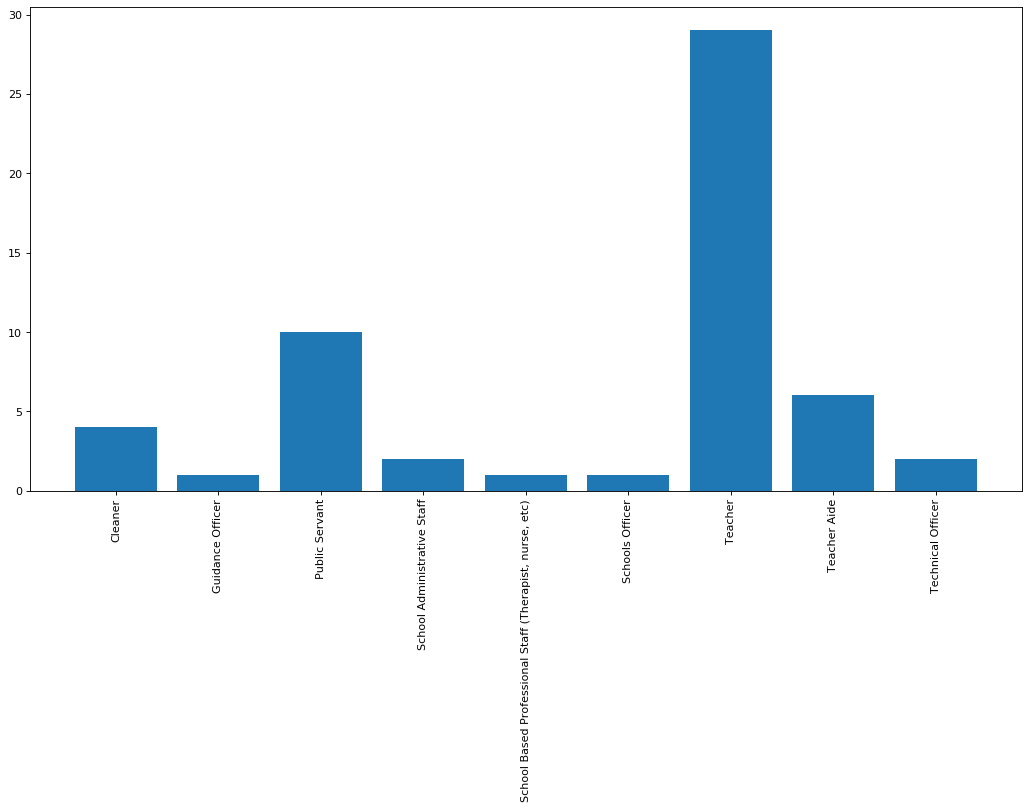

In [99]:
#plot the distribution for investigation:
plt.figure(figsize=(16, 8), dpi=80)
plt.bar(position_dissatifaction_group['Position'], position_dissatifaction_group['Employment Status'])
plt.xticks(rotation = 90)
plt.show()

In [101]:
age_dissatisfication_group = resign_dissatisfaction.groupby(['Age'], as_index=True).agg({'Employment Status': "count"}).reset_index()
age_dissatisfication_group

,Age,Employment Status
0,21-25,3
1,26-30,7
2,31-35,8
3,36-40,6
4,41-45,7
5,46-50,5
6,51-55,10
7,56-60,5
8,61 or older,7


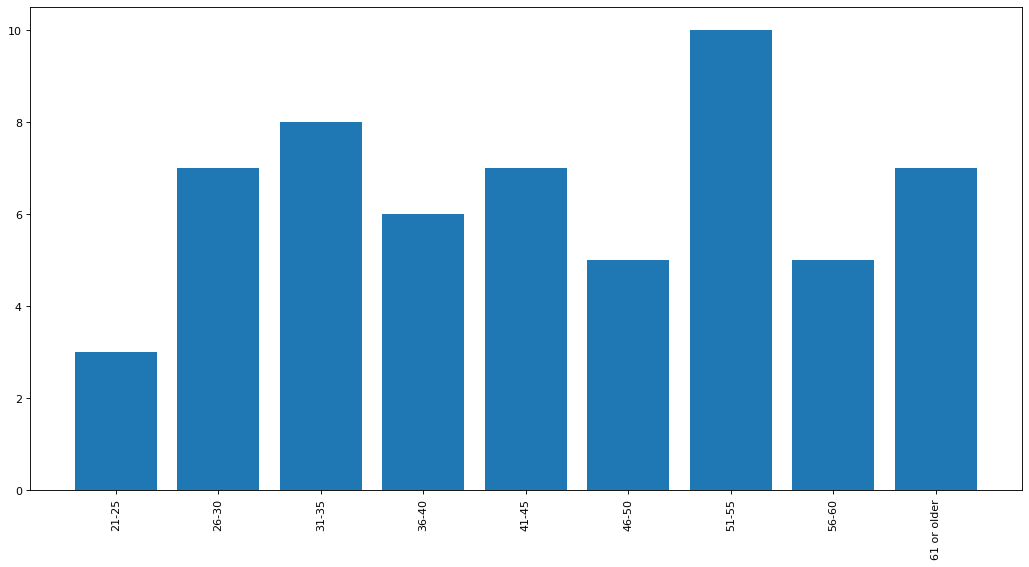

In [103]:
#plot the distribution for investigation:
plt.figure(figsize=(16, 8), dpi=80)
plt.bar(age_dissatisfication_group['Age'], age_dissatisfication_group['Employment Status'])
plt.xticks(rotation = 90)
plt.show()

In [104]:
region_dissatisfication_group = resign_dissatisfaction.groupby(['Region'], as_index=True).agg({'Employment Status': "count"}).reset_index()
region_dissatisfication_group

,Region,Employment Status
0,Central Office,8
1,Central Queensland,10
2,Darling Downs South West,4
3,Far North Queensland,1
4,Metropolitan,9
5,North Coast,2
6,North Queensland,8
7,Not Stated,7
8,South East,9


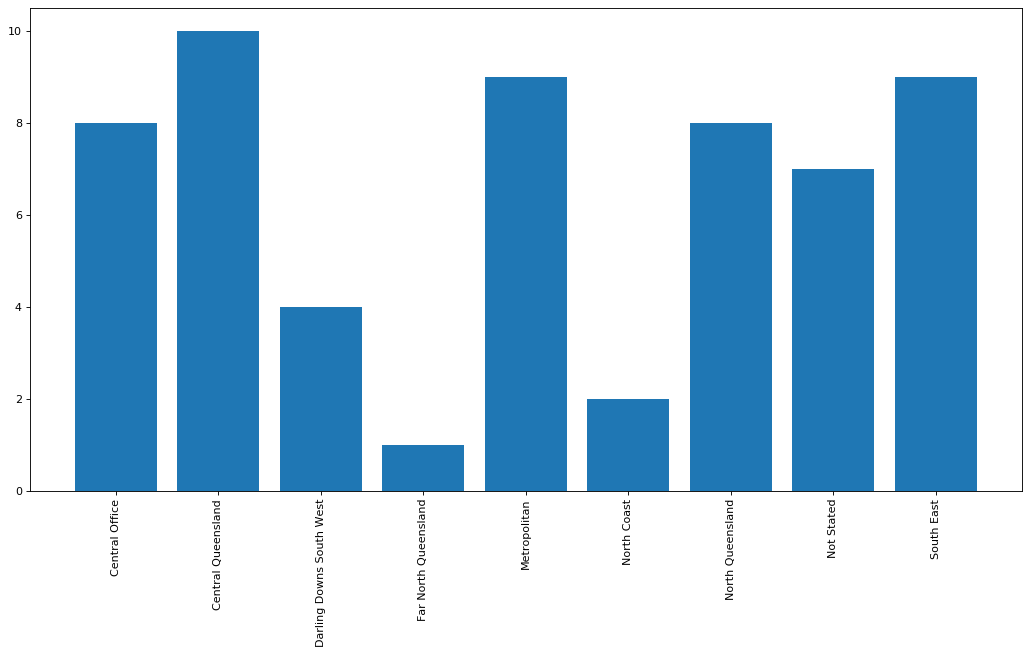

In [105]:
#plot the distribution for investigation:
plt.figure(figsize=(16, 8), dpi=80)
plt.bar(region_dissatisfication_group['Region'], region_dissatisfication_group['Employment Status'])
plt.xticks(rotation = 90)
plt.show()

In [107]:
tafe

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [131]:
tafe['Classification. Classification'].describe()

count                     596
unique                      9
top       Administration (AO)
freq                      293
Name: Classification. Classification, dtype: object

In [132]:
columns_keep = ['Record ID', 'Institute','CESSATION YEAR','Reason for ceasing employment','Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction','Gender. What is your Gender?','CurrentAge. Current Age','Employment Type. Employment Type','Classification. Classification']
tafe_clean = tafe[columns_keep]

In [133]:
tafe_clean

,Record ID,Institute,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification
0,6.341330e+17,Southern Queensland Institute of TAFE,2010.0,Contract Expired,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO)
1,6.341337e+17,Mount Isa Institute of TAFE,2010.0,Retirement,-,-,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,2010.0,Retirement,-,-,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,2010.0,Resignation,-,-,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,2010.0,Resignation,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT)
...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,2013.0,Resignation,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT)
698,6.350677e+17,Southern Queensland Institute of TAFE,2013.0,Resignation,-,-,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,2013.0,Resignation,-,-,Female,51-55,Permanent Full-time,Teacher (including LVT)
700,6.350712e+17,Southbank Institute of Technology,2013.0,Contract Expired,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO)


In [134]:
resign_tafe_clean = tafe_clean[tafe_clean['Reason for ceasing employment']=='Resignation']
resign_tafe_clean

,Record ID,Institute,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification
3,6.341399e+17,Mount Isa Institute of TAFE,2010.0,Resignation,-,-,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,2010.0,Resignation,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT)
5,6.341475e+17,Southern Queensland Institute of TAFE,2010.0,Resignation,-,-,Female,56 or older,Contract/casual,Teacher (including LVT)
6,6.341520e+17,Barrier Reef Institute of TAFE,2010.0,Resignation,-,-,Male,20 or younger,Temporary Full-time,Administration (AO)
7,6.341537e+17,Southern Queensland Institute of TAFE,2010.0,Resignation,-,-,Male,46 50,Permanent Full-time,Teacher (including LVT)
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,2013.0,Resignation,-,-,Male,21 25,Temporary Full-time,Operational (OO)
697,6.350668e+17,Barrier Reef Institute of TAFE,2013.0,Resignation,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT)
698,6.350677e+17,Southern Queensland Institute of TAFE,2013.0,Resignation,-,-,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,2013.0,Resignation,-,-,Female,51-55,Permanent Full-time,Teacher (including LVT)


In [135]:
resign_tafe_clean['Contributing Factors. Job Dissatisfaction'].unique()

array(['-', 'Job Dissatisfaction', nan], dtype=object)

In [136]:
resign_tafe_dissatisfication = resign_tafe_clean[(resign_tafe_clean['Contributing Factors. Dissatisfaction'] == 'Contributing Factors. Dissatisfaction ')|(resign_tafe_clean['Contributing Factors. Job Dissatisfaction'] == 'Job Dissatisfaction')]

In [137]:
resign_tafe_dissatisfication

,Record ID,Institute,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification
14,6.341726e+17,Central Queensland Institute of TAFE,2010.0,Resignation,Contributing Factors. Dissatisfaction,Job Dissatisfaction,Female,31 35,Permanent Part-time,Teacher (including LVT)
17,6.341771e+17,Brisbane North Institute of TAFE,2010.0,Resignation,-,Job Dissatisfaction,Female,31 35,Permanent Full-time,Administration (AO)
20,6.341821e+17,Brisbane North Institute of TAFE,2010.0,Resignation,Contributing Factors. Dissatisfaction,Job Dissatisfaction,NaN,NaN,NaN,NaN
26,6.341934e+17,Mount Isa Institute of TAFE,2010.0,Resignation,Contributing Factors. Dissatisfaction,Job Dissatisfaction,NaN,NaN,NaN,NaN
40,6.342090e+17,Sunshine Coast Institute of TAFE,2010.0,Resignation,Contributing Factors. Dissatisfaction,-,Female,26 30,Temporary Part-time,Administration (AO)
...,...,...,...,...,...,...,...,...,...,...
661,6.350003e+17,Brisbane North Institute of TAFE,2013.0,Resignation,-,Job Dissatisfaction,Female,46 50,Permanent Full-time,Administration (AO)
671,6.350127e+17,Tropical North Institute of TAFE,2013.0,Resignation,-,Job Dissatisfaction,Female,46 50,Temporary Full-time,Teacher (including LVT)
675,6.350175e+17,Tropical North Institute of TAFE,2013.0,Resignation,Contributing Factors. Dissatisfaction,Job Dissatisfaction,Male,51-55,Temporary Full-time,Teacher (including LVT)
685,6.350402e+17,Brisbane North Institute of TAFE,2013.0,Resignation,Contributing Factors. Dissatisfaction,Job Dissatisfaction,Female,26 30,Temporary Full-time,Technical Officer (TO)


In [138]:
resign_tafe_dissatisfication.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 14 to 689
Data columns (total 10 columns):
Record ID                                    91 non-null float64
Institute                                    91 non-null object
CESSATION YEAR                               89 non-null float64
Reason for ceasing employment                91 non-null object
Contributing Factors. Dissatisfaction        91 non-null object
Contributing Factors. Job Dissatisfaction    91 non-null object
Gender. What is your Gender?                 77 non-null object
CurrentAge. Current Age                      77 non-null object
Employment Type. Employment Type             77 non-null object
Classification. Classification               77 non-null object
dtypes: float64(2), object(8)
memory usage: 7.8+ KB


In [142]:
position_dissati_group_tafe = resign_tafe_dissatisfication.groupby(['Classification. Classification'], as_index=True).agg({'Institute': "count"}).reset_index()
position_dissati_group_tafe

,Classification. Classification,Institute
0,Administration (AO),32
1,Executive (SES/SO),2
2,Operational (OO),3
3,Professional Officer (PO),2
4,Teacher (including LVT),36
5,Technical Officer (TO),2


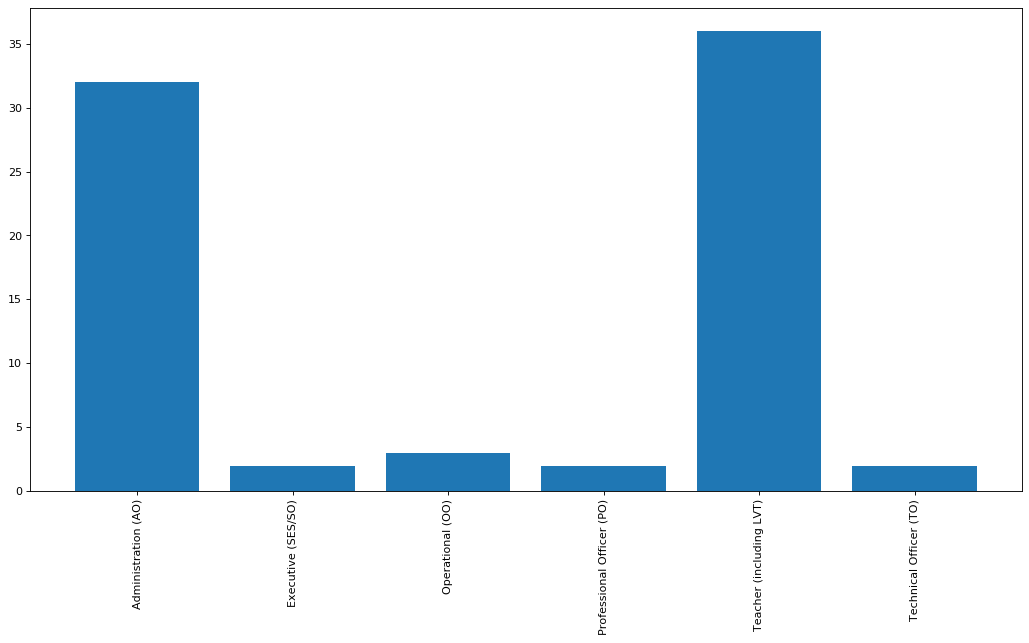

In [143]:
plt.figure(figsize=(16, 8), dpi=80)
plt.bar(position_dissati_group_tafe['Classification. Classification'], position_dissati_group_tafe['Institute'])
plt.xticks(rotation = 90)
plt.show()

In [146]:
institute_dissati_group_tafe = resign_tafe_dissatisfication.groupby(['Institute'], as_index=True).agg({'Record ID': "count"}).reset_index()
institute_dissati_group_tafe

,Institute,Record ID
0,Brisbane North Institute of TAFE,16
1,Central Queensland Institute of TAFE,17
2,Mount Isa Institute of TAFE,4
3,SkillsTech Australia,14
4,Southbank Institute of Technology,4
5,Southern Queensland Institute of TAFE,18
6,Sunshine Coast Institute of TAFE,10
7,Tropical North Institute of TAFE,8


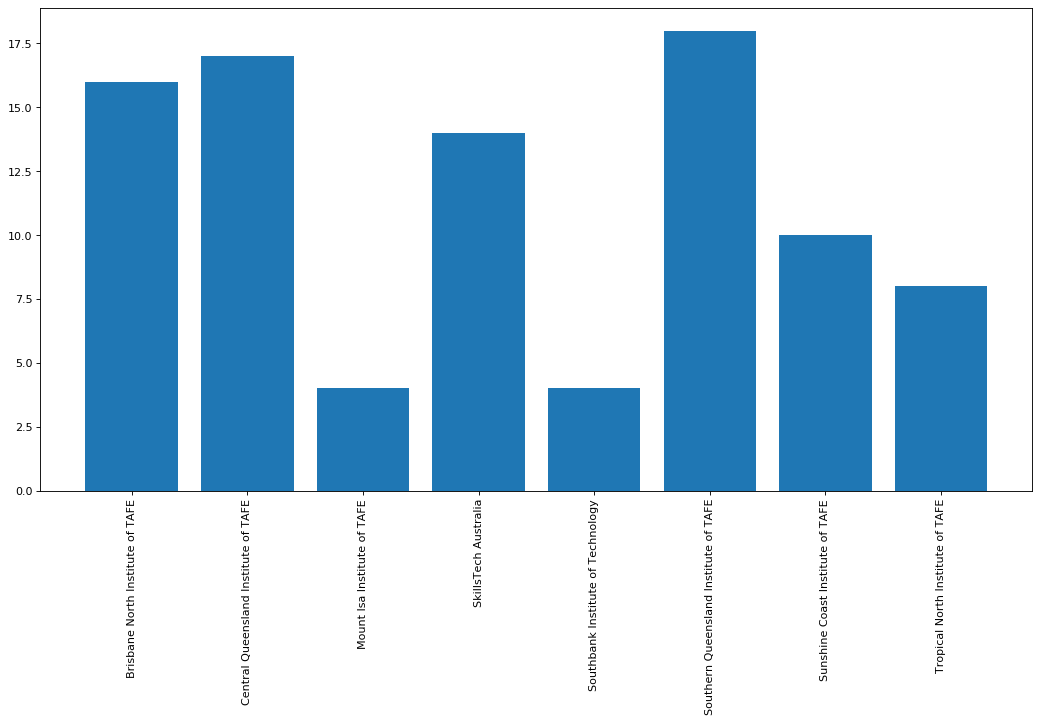

In [148]:
plt.figure(figsize=(16, 8), dpi=80)
plt.bar(institute_dissati_group_tafe['Institute'], institute_dissati_group_tafe['Record ID'])
plt.xticks(rotation = 90)
plt.show()

In [150]:
age_dissati_group_tafe = resign_tafe_dissatisfication.groupby(['CurrentAge. Current Age'], as_index=True).agg({'Record ID': "count"}).reset_index()
age_dissati_group_tafe

,CurrentAge. Current Age,Record ID
0,20 or younger,2
1,21 25,10
2,26 30,8
3,31 35,7
4,36 40,9
5,41 45,12
6,46 50,12
7,51-55,11
8,56 or older,6


In [ ]:
region_dissati_group_tafe = resign_tafe_dissatisfication.groupby(['CurrentAge. Current Age'], as_index=True).agg({'Record ID': "count"}).reset_index()
region_dissati_group_tafe